In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold

**Load the cleaned data**

In [2]:
current_dir = os.getcwd() 
relative_path_train = os.path.join('..', 'data', 'cleaned_train_data.csv')
relative_path_test = os.path.join('..', 'data', 'cleaned_test_data.csv')

cleaned_train_data = pd.read_csv(os.path.join(current_dir, relative_path_train))
cleaned_test_data = pd.read_csv(os.path.join(current_dir, relative_path_test))

In [3]:
cleaned_train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103590,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103591,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103592,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


**Univariate Analysis**

Histogram for numerical vaiables and Pie charts for categorical variables

In [4]:
# Define custom colors for the pie charts
# colors kteer 34an i am just a girrrrrrll
#colors = [ '#b9eee1', '#79d3be', '#39b89a','#ff5883', '#ff91ad', '#fec9d7']
#colors = ['#a8e8f9', '#00537a', '#013c58', '#f5a201', '#ffba42', '#ffd35b']
#colors = ['#9f8be8', '#af99ff', '#caadff', '#ffc2e2', '#ffadc7', '#ff99b6']
#colors = ['#535878', '#9db0ce', '#b8d8e3', '#fee1dd', '#e9c2c5', '#cea0aa']
colors = ['#5a77d8', '#81b1fb', '#c3dbfd', '#ff5db6', '#fe86c8', '#ffc0db']

# Pie charts for each variable
categorical_variables = [
    'satisfaction', 'Gender', 'Customer Type', 'Type of Travel',
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Class', 'Gate location', 'Food and drink',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness','Online boarding'
]

continuous_variables = ['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']


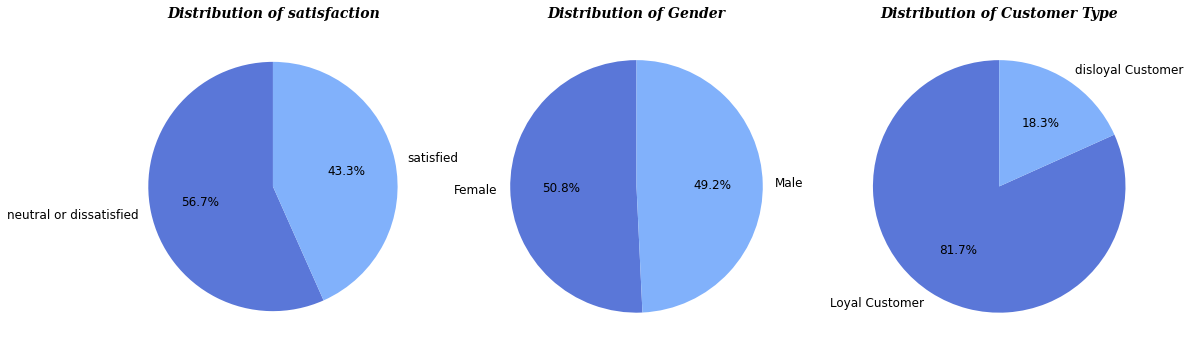

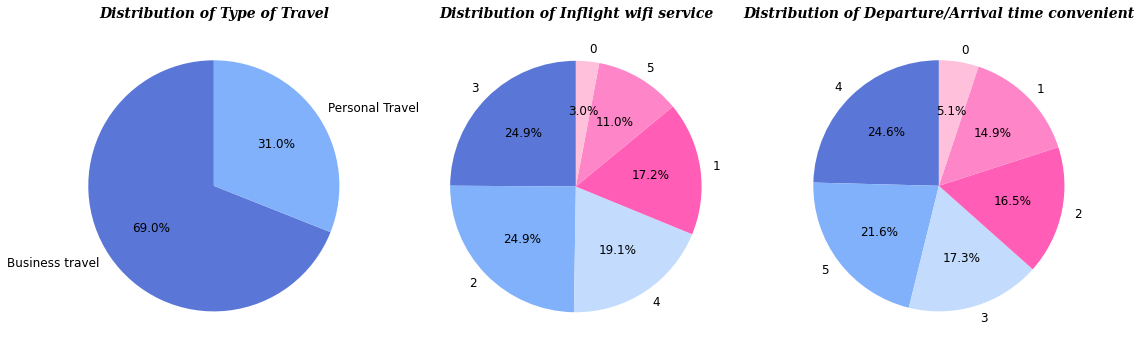

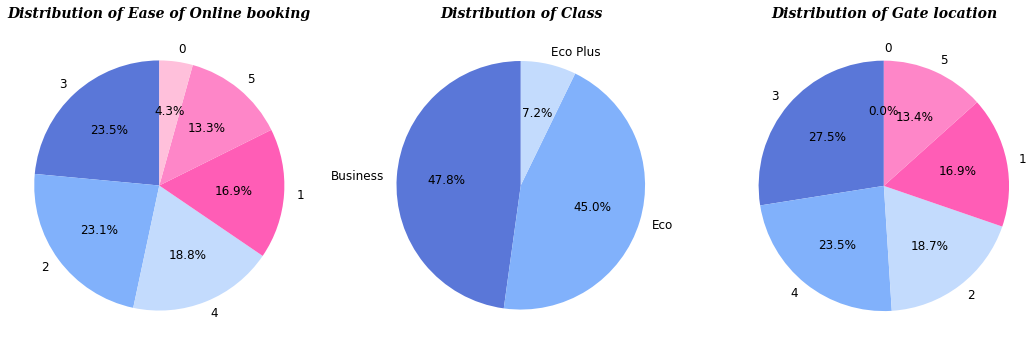

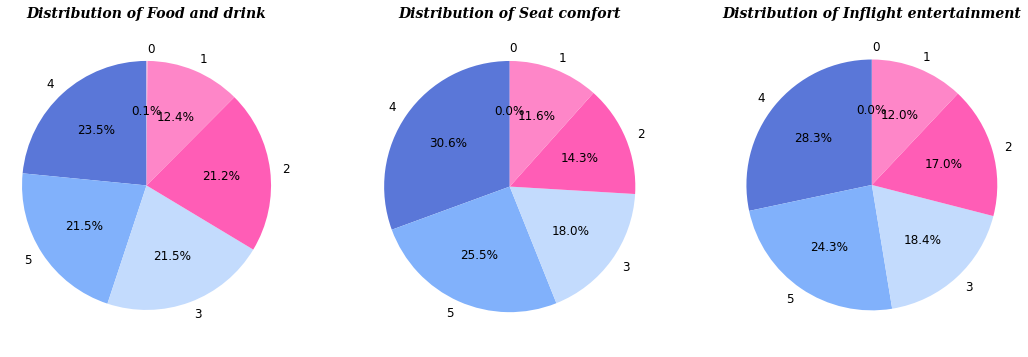

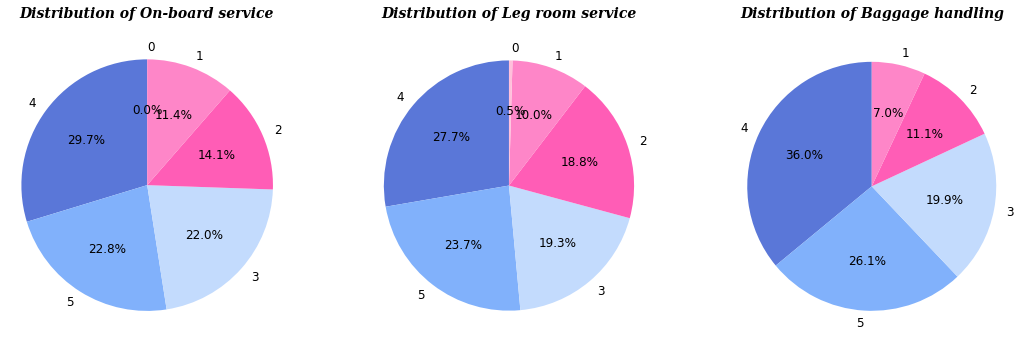

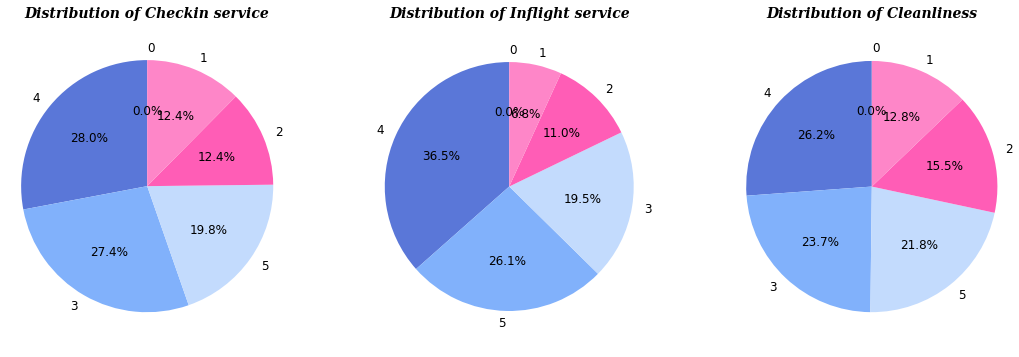

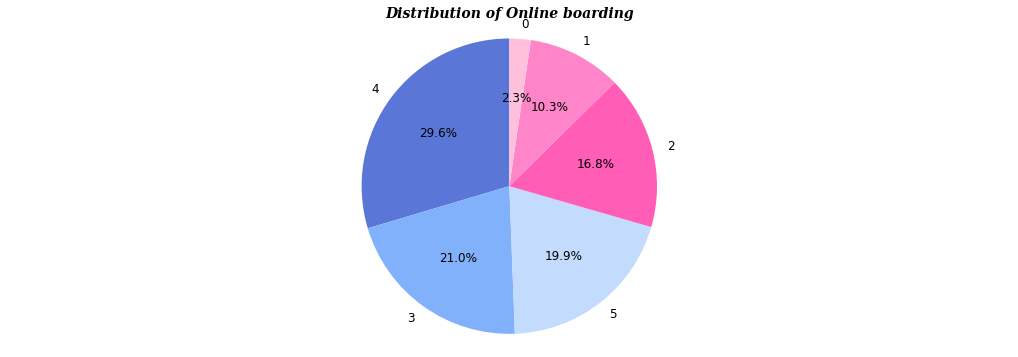

In [5]:
# Create subplots for each group of 3 variables
for i in range(0, len(categorical_variables), 3):
    num_vars = min(3, len(categorical_variables[i:]))  # Adjust the number of variables in the last group
    fig, axs = plt.subplots(1, num_vars, figsize=(18, 6))  # Set a fixed figure size
    
    # If there is only one variable in the last group, convert axs to a list to make it subscriptable
    if num_vars == 1:
        axs = [axs]
    
    for j, var in enumerate(categorical_variables[i:i+num_vars]):
        counts = cleaned_train_data[var].value_counts()
        axs[j].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12, 'color': 'black'})
        axs[j].set_title(f'Distribution of {var}', color='black', fontsize=14,fontweight='bold', fontstyle='italic', fontfamily='serif')
        axs[j].axis('equal')  
    
    plt.subplots_adjust(wspace=0.3)
    plt.show()

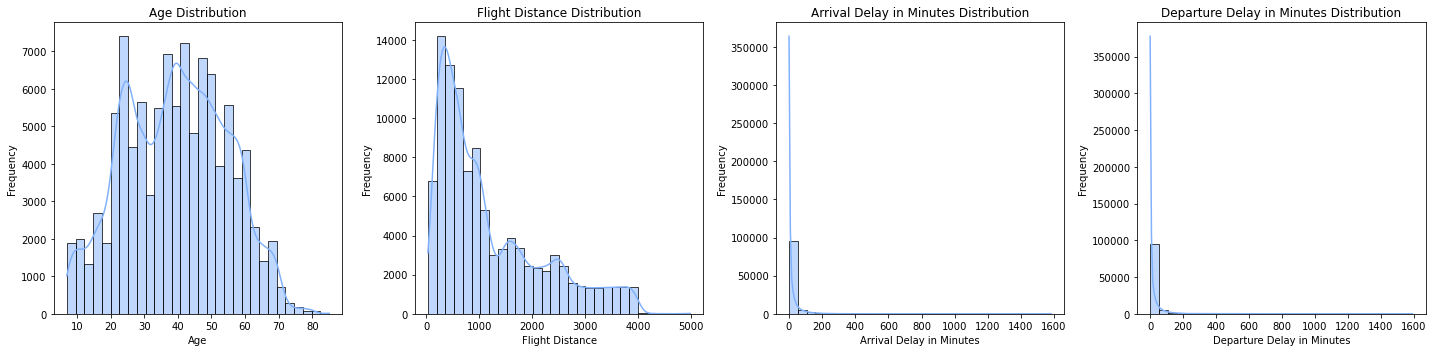

In [6]:
# Histograms for numerical variables
plt.figure(figsize=(20, 5))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(1, 4, i)
    sns.histplot(cleaned_train_data[col], bins=30, kde=True, color='#81b1fb')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [7]:
'''
Insights:
- There is an equal number of male and female participants in the survey.
- Most of passengers are neutral or dissatisfied = 56.7%
- The most frequent age that travel is in range[38,42] and [23,28]
- Very few people fly in the economy plus class. They usually prefer Economy or Business.
- Most of travels are for Business travel.
- We have more loyal customer data
- Arrival Delay & Departure Delay have outliers  ==> We need to handle this.
- The variables Flight Distance and Departure Delay and Arrival Delay  are all heavily right-skewed
'''

'\nInsights:\n- There is an equal number of male and female participants in the survey.\n- Most of passengers are neutral or dissatisfied = 56.7%\n- The most frequent age that travel is in range[38,42] and [23,28]\n- Very few people fly in the economy plus class. They usually prefer Economy or Business.\n- Most of travels are for Business travel.\n- We have more loyal customer data\n- Arrival Delay & Departure Delay have outliers  ==> We need to handle this.\n- The variables Flight Distance and Departure Delay and Arrival Delay  are all heavily right-skewed\n'

**Solve problem of right-skewness**

In [8]:
'''
Think about this part==> if we solve the skew, there will be no outliers and vice versa.
Choose one problem to solve
'''


# right_skewed = ["Flight Distance", "Departure Delay in Minutes","Arrival Delay in Minutes"]
# # Normalize the numeric variables 
# for x in right_skewed:
#     cleaned_data[x] = np.log(cleaned_data[x])

# # Histograms for numerical variables
# plt.figure(figsize=(20, 5))
# for i, col in enumerate(continuous_variables, 1):
#     plt.subplot(1, 4, i)
#     sns.histplot(cleaned_data[col], bins=30, kde=True, color='#81b1fb')
#     plt.title(f'{col} Distribution')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

'\nThink about this part==> if we solve the skew, there will be no outliers and vice versa.\nChoose one problem to solve\n'

In [9]:
'''
"Departure Delay in Minutes", "Arrival Delay in Minutes" and "Fight Distance" are now more normally distribured.
'''

'\n"Departure Delay in Minutes", "Arrival Delay in Minutes" and "Fight Distance" are now more normally distribured.\n'

In [10]:
Q1 = cleaned_train_data.quantile(0.25)
Q3 = cleaned_train_data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (cleaned_train_data < lower_bound) | (cleaned_train_data > upper_bound)

outliers_count = outliers.sum()

print("Number of outliers in each column:")
print(outliers_count)


C:\Users\user\AppData\Local\Temp\ipykernel_21544\659447327.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (cleaned_train_data < lower_bound) | (cleaned_train_data > upper_bound)


Number of outliers in each column:
Age                                      0
Arrival Delay in Minutes             13954
Baggage handling                         0
Checkin service                      12853
Class                                    0
Cleanliness                              0
Customer Type                            0
Departure Delay in Minutes           14428
Departure/Arrival time convenient        0
Ease of Online booking                   0
Flight Distance                       2287
Food and drink                           0
Gate location                            0
Gender                                   0
Inflight entertainment                   0
Inflight service                         0
Inflight wifi service                    0
Leg room service                         0
On-board service                         0
Online boarding                          0
Seat comfort                             0
Type of Travel                           0
satisfaction       

**Bivariate Analysis**

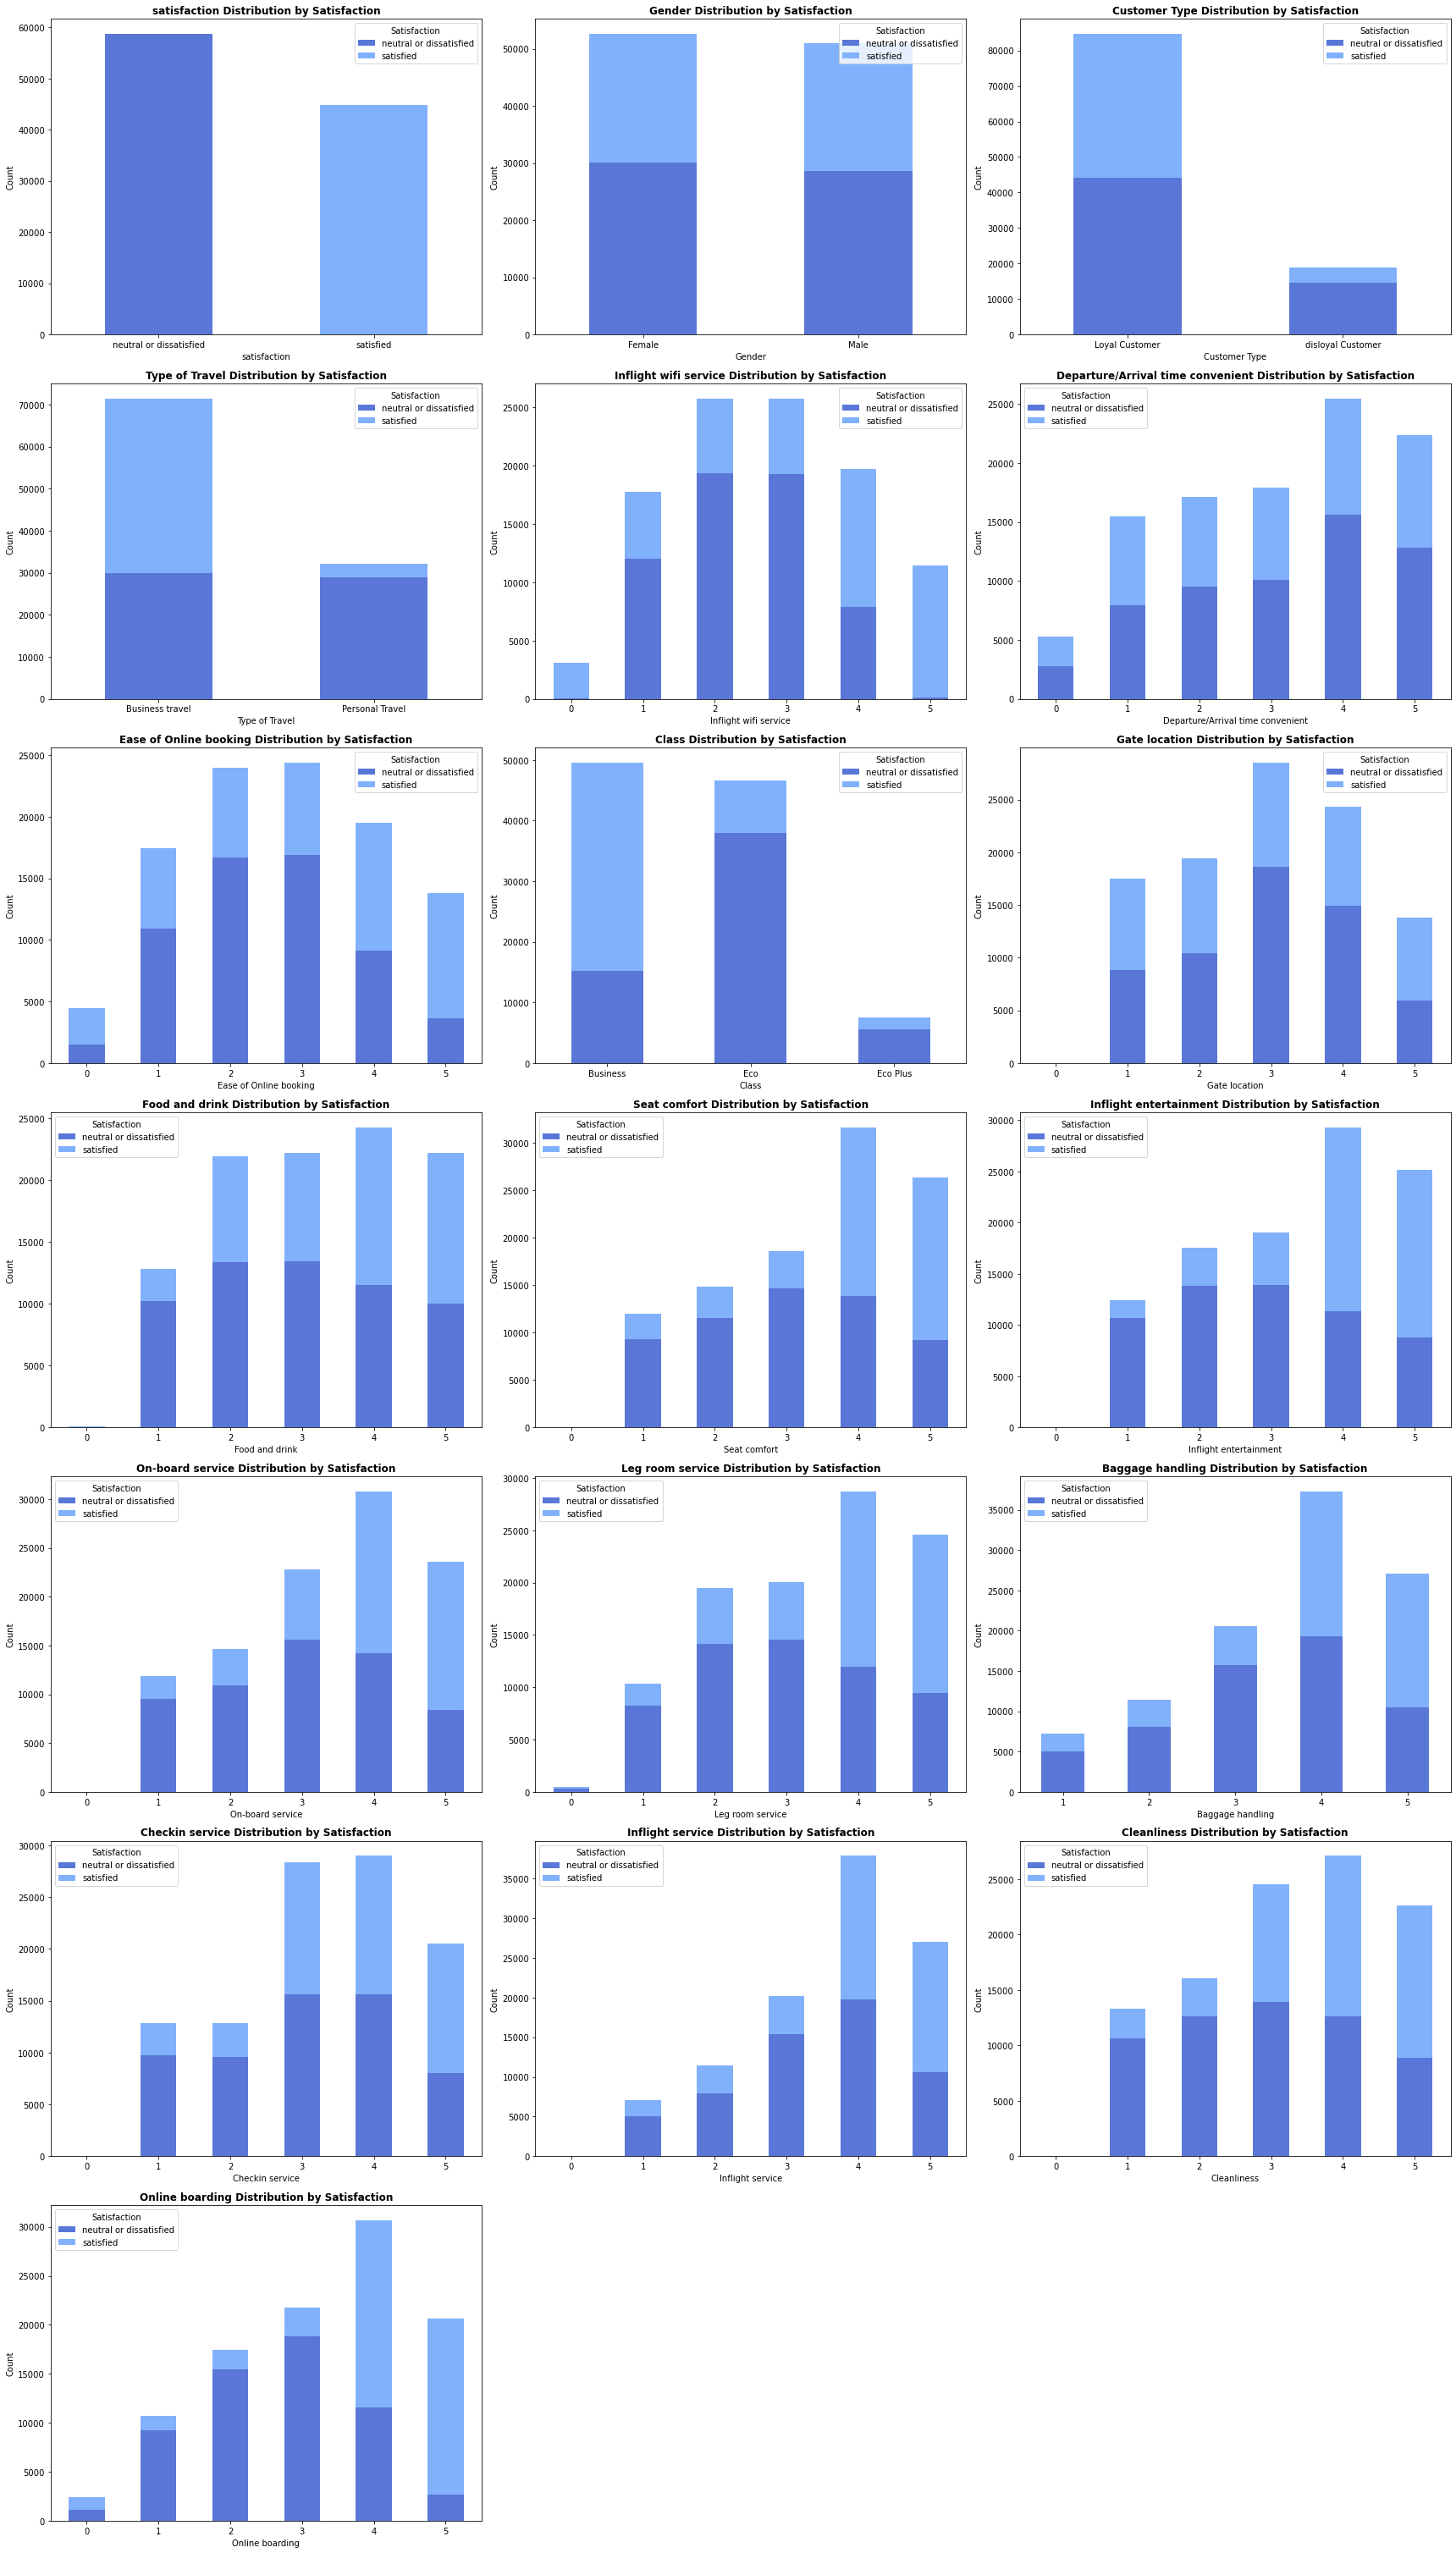

In [11]:
num_plots = len(categorical_variables)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

plt.figure(figsize=(24, 6 * num_rows))  # Adjusting the figure size based on the number of rows

for i, col in enumerate(categorical_variables, 1):
    plt.subplot(num_rows, num_cols, i)
    satisfaction_counts = cleaned_train_data.groupby([col, 'satisfaction']).size().unstack()
    satisfaction_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#5a77d8', '#81b1fb'])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Distribution by Satisfaction', fontweight='bold')  # Set font weight to bold
    plt.legend(title='Satisfaction')
    plt.xticks(rotation=0)  # Set x-axis tick labels rotation to 0 degrees (horizontal)

plt.tight_layout()
plt.show()

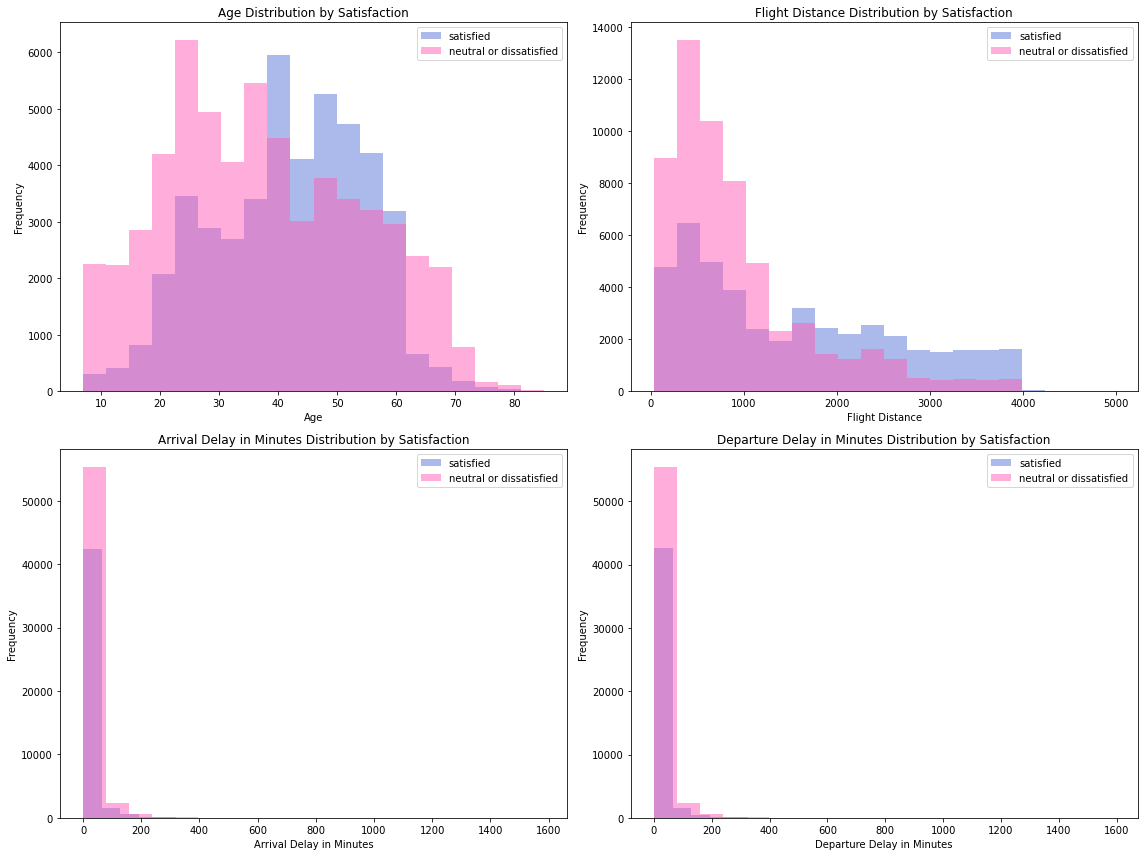

In [12]:
# Continuous histograms for numerical columns showing distribution of satisfaction
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(2, 2, i)
    plt.hist(cleaned_train_data[cleaned_train_data['satisfaction'] == 'satisfied'][col], bins=20, alpha=0.5, color='#5a77d8', label='satisfied')
    plt.hist(cleaned_train_data[cleaned_train_data['satisfaction'] == 'neutral or dissatisfied'][col], bins=20, alpha=0.5, color='#ff5db6', label='neutral or dissatisfied')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{col} Distribution by Satisfaction')

plt.tight_layout()
plt.show()

In [13]:
'''
Insights:

  - Satisfied Passengers are in range [40-56] year & Unsatisfied are in range [20-40] year.
  - Satisfied Passengers have more long-distance flight than the dissatisfied.
  - Satisfied Passengers usually go for Business travel.
  - Satisfied Passengers use Business Class while travelling.
  - More than 80% of passengers flying in economy are either Neutral or Dissatisfied. That shows us that it needs some impromevent.
  - The most frequency in the levels of satisfaction is 4 for all except: [Inflight wifi service, Ease of Online booking, Gate location] is 3 
  - Rate 3 is the most frequenent between unsatisfied passengers in services
  -  Our passengers have mixed opinions about the Departure and Arrival Time Convenience.
     The ratings are almost evenly distributed between 1 and 5.
     With that in mind, the positive thing is that there are more positive or neutral ratings (3 through 5)
     than negative ones (0 through 2).
     We come to the conclusion that there is not that much correlation between total Satisfaction
     and Departure and Arrival Time Convenience.
     .
     .
     .
     .
     Write this for all passenger reviews
     
  - 
'''

'\nInsights:\n\n  - Satisfied Passengers are in range [40-56] year & Unsatisfied are in range [20-40] year.\n  - Satisfied Passengers have more long-distance flight than the dissatisfied.\n  - Satisfied Passengers usually go for Business travel.\n  - Satisfied Passengers use Business Class while travelling.\n  - More than 80% of passengers flying in economy are either Neutral or Dissatisfied. That shows us that it needs some impromevent.\n  - The most frequency in the levels of satisfaction is 4 for all except: [Inflight wifi service, Ease of Online booking, Gate location] is 3 \n  - Rate 3 is the most frequenent between unsatisfied passengers in services\n  -  Our passengers have mixed opinions about the Departure and Arrival Time Convenience.\n     The ratings are almost evenly distributed between 1 and 5.\n     With that in mind, the positive thing is that there are more positive or neutral ratings (3 through 5)\n     than negative ones (0 through 2).\n     We come to the conclusion

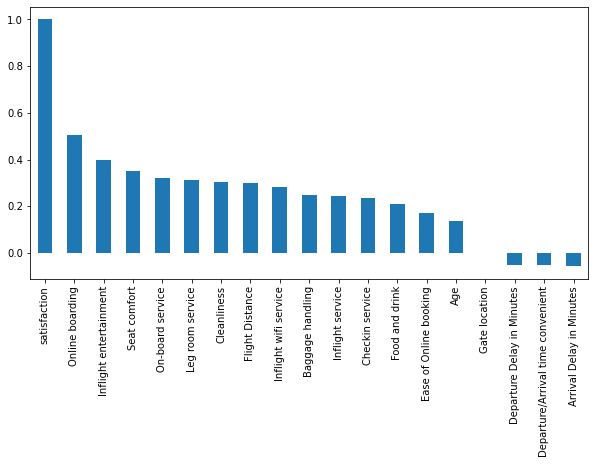

In [14]:
plt.figure(figsize = (10,5))

cleaned_train_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
df_dummies = pd.get_dummies(cleaned_train_data)
cleaned_train_data.corr()['satisfaction'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [15]:
'''
Positively Correlated:
  - Business Class ,online boarding and Business travels are strong reasons for people satisfaction.
Negatively Correlated:
  - Personal Travels and Economy Class results in Unsatisfaction.
'''

'\nPositively Correlated:\n  - Business Class ,online boarding and Business travels are strong reasons for people satisfaction.\nNegatively Correlated:\n  - Personal Travels and Economy Class results in Unsatisfaction.\n'

**Multivariate Analysis**

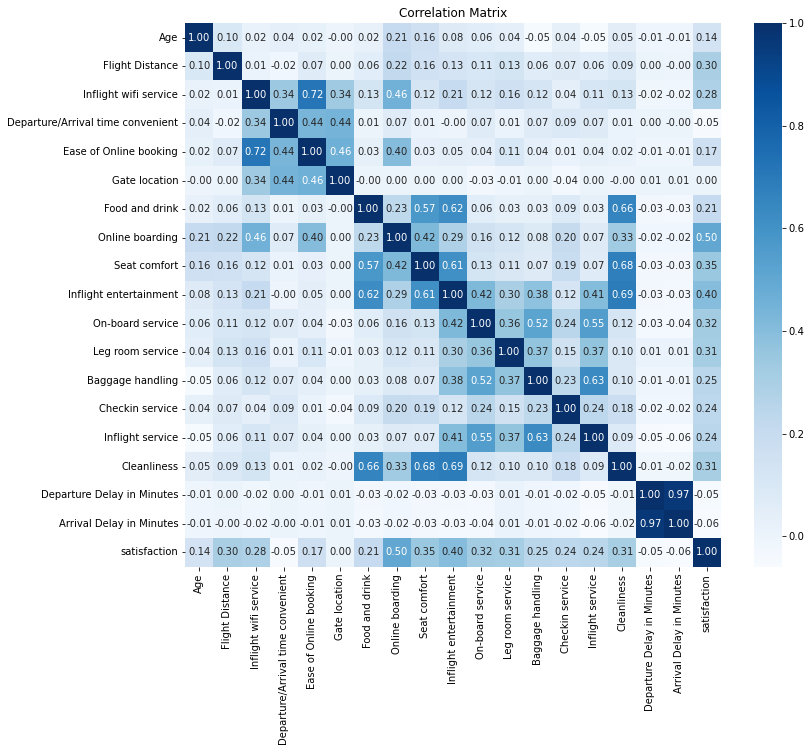

In [16]:
import seaborn as sns

# Compute the correlation matrix
corr = cleaned_train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [17]:
'''
Insights:
- Departure Delay is highly correlated with Arrival Delay. [Will deal with this in feature engineering]
- Inflight WiFi service and Ease of online booking are correlated.
- Inflight entertainment, Food and Drink , Seat comfort and cleanliness are correlated .
- Baggage handling is correlated with Inflight handling
'''

'\nInsights:\n- Departure Delay is highly correlated with Arrival Delay. [Will deal with this in feature engineering]\n- Inflight WiFi service and Ease of online booking are correlated.\n- Inflight entertainment, Food and Drink , Seat comfort and cleanliness are correlated .\n- Baggage handling is correlated with Inflight handling\n'

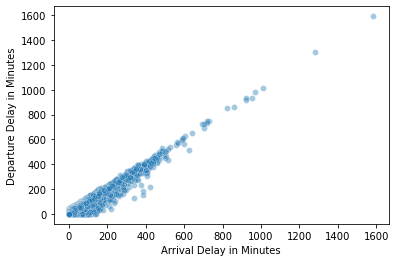

In [18]:
sns.scatterplot(x ='Arrival Delay in Minutes' , y = 'Departure Delay in Minutes' , data = cleaned_train_data,alpha=0.4)
plt.show()

In [19]:
'''
- There is a strong correlation between the two columns
  we can drop one of the two columns and as Arrival Delay in Minutes column has some null , we can drop it.

- We can also see the outliers here. 
'''

'\n- There is a strong correlation between the two columns\n  we can drop one of the two columns and as Arrival Delay in Minutes column has some null , we can drop it.\n\n- We can also see the outliers here. \n'

**Remove outliers**

In [20]:
cleaned_data_no_outliers = cleaned_train_data.copy()

# Identify outliers
outliers = (cleaned_train_data < lower_bound) | (cleaned_train_data > upper_bound)

# Replace outliers with the lower/upper bound
cleaned_data_no_outliers = cleaned_data_no_outliers.where(~outliers, lower_bound, axis=1)
cleaned_data_no_outliers = cleaned_data_no_outliers.where(~outliers, upper_bound, axis=1)

# Check the new data
outliers_removed_count = outliers.sum()
print("Number of outliers removed in each column:")
print(outliers_removed_count)


C:\Users\user\AppData\Local\Temp\ipykernel_21544\595892071.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (cleaned_train_data < lower_bound) | (cleaned_train_data > upper_bound)


Number of outliers removed in each column:
Age                                      0
Arrival Delay in Minutes             13954
Baggage handling                         0
Checkin service                      12853
Class                                    0
Cleanliness                              0
Customer Type                            0
Departure Delay in Minutes           14428
Departure/Arrival time convenient        0
Ease of Online booking                   0
Flight Distance                       2287
Food and drink                           0
Gate location                            0
Gender                                   0
Inflight entertainment                   0
Inflight service                         0
Inflight wifi service                    0
Leg room service                         0
On-board service                         0
Online boarding                          0
Seat comfort                             0
Type of Travel                           0
satisfactio

C:\Users\user\AppData\Local\Temp\ipykernel_21544\595892071.py:8: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  cleaned_data_no_outliers = cleaned_data_no_outliers.where(~outliers, upper_bound, axis=1)


**Drop Arrival delay in minutes column**

In [21]:
preprocessed_train_data = cleaned_data_no_outliers.drop(columns=["Arrival Delay in Minutes"])
preprocessed_test_data = cleaned_test_data.drop(columns=["Arrival Delay in Minutes"])

In [22]:
preprocessed_train_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

**Encode target variable**

In [23]:
# For training data
le = LabelEncoder()
col_encoded = le.fit_transform(preprocessed_train_data['satisfaction'])
preprocessed_train_data['satisfaction'] = col_encoded
preprocessed_train_data['satisfaction'].unique()

# For testing data
le = LabelEncoder()
col_encoded = le.fit_transform(preprocessed_test_data['satisfaction'])
preprocessed_test_data['satisfaction'] = col_encoded
preprocessed_test_data['satisfaction'].unique()

array([1, 0])

**Drop unnecessary columns**

In [24]:
#NOTE: Revise this part

# drop_columns = ['Gender','Gate location','Departure/Arrival time convenient']
# cleaned_data.drop(drop_columns,axis=1,inplace=True)
# cleaned_data.head()

**Data Encoding**

In [25]:
'''
OneHot Encoding is a process used in data analysis and machine learning 
to convert categorical variables into numerical format. 
It creates binary vectors where each category is encoded as a binary feature.
 In this encoding scheme, each category is represented by a vector of zeros with only one element being 1, 
 known as the "hot" element.
This encoding helps in representing categorical data in a way that can be easily understood 
and processed by machine learning algorithms.
'''

'\nOneHot Encoding is a process used in data analysis and machine learning \nto convert categorical variables into numerical format. \nIt creates binary vectors where each category is encoded as a binary feature.\n In this encoding scheme, each category is represented by a vector of zeros with only one element being 1, \n known as the "hot" element.\nThis encoding helps in representing categorical data in a way that can be easily understood \nand processed by machine learning algorithms.\n'

In [26]:
preprocessed_train_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [27]:
encoder = OneHotEncoder()
columns_to_encode = ['Customer Type', 'Type of Travel', 'Class','Gender']
#FOR TRAIN DATA
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(preprocessed_train_data[columns_to_encode])

encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

preprocessed_train_data.drop(columns_to_encode, axis=1, inplace=True)
preprocessed_train_data[encoded_column_names] = encoded_columns 

#preprocessed_train_data.head()


#FOR TEST DATA
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(preprocessed_test_data[columns_to_encode])

encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

preprocessed_test_data.drop(columns_to_encode, axis=1, inplace=True)
preprocessed_test_data[encoded_column_names] = encoded_columns 

preprocessed_test_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
0,52,160,5,4,3,4,3,4,3,5,...,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,36,2863,1,1,3,1,5,4,5,4,...,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,20,192,2,0,2,4,2,2,2,2,...,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,44,3377,0,0,0,2,3,4,4,1,...,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,49,1182,2,3,4,3,4,1,2,2,...,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


**Standardization**

In [28]:
'''
Standardization scales features by subtracting the mean and then dividing by the standard deviation.
This results in features that have a mean of 0 and a standard deviation of 1.
'''

'\nStandardization scales features by subtracting the mean and then dividing by the standard deviation.\nThis results in features that have a mean of 0 and a standard deviation of 1.\n'

In [29]:
columns_to_scale = ['Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

In [30]:
scaler = StandardScaler()
# IN TRAIN DATA
scaled_values = scaler.fit_transform(preprocessed_train_data[columns_to_scale])
preprocessed_train_data[columns_to_scale] = scaled_values

In [31]:
aggregated_train = preprocessed_train_data[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Blues')
aggregated_train

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
min,-2.142550,-1.168727,-2.055754,-1.970785,-2.408709,-2.408800,-2.608076,-2.519340,-2.625682,-2.547814,-2.228269,-1.680338,-3.096946,-2.504518,-0.658095
max,3.018552,2.580793,1.709704,1.603383,1.352401,1.296479,1.182991,1.231530,1.255467,1.253304,1.158561,1.477088,1.156211,1.305913,2.017821
median,0.040993,-0.348093,0.203521,0.173716,-0.152043,-0.185632,0.424778,0.481356,0.479237,0.493081,0.311853,0.123905,0.305580,-0.218259,-0.658095
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005


In [32]:
# IN TEST DATA
scaled_values = scaler.fit_transform(preprocessed_test_data[columns_to_scale])
preprocessed_test_data[columns_to_scale] = scaled_values

In [33]:
aggregated_train = preprocessed_test_data[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Blues')
aggregated_train

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
min,-2.155552,-1.164375,-2.040712,-1.951113,-2.413843,-2.406245,-1.854895,-2.507789,-2.640847,-2.539602,-2.238298,-1.823246,-3.090581,-2.490296,-0.382547
max,2.998429,3.794531,1.705489,1.588648,1.340280,1.282487,1.174883,1.227409,1.259285,1.251091,1.162491,1.328559,1.144456,1.299508,29.952101
median,0.024978,-0.345234,0.207008,0.172743,-0.161369,0.544741,0.417438,0.480370,0.479258,0.492953,0.312294,-0.247344,0.297449,-0.216414,-0.382547
std,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019,1.000019


**Data Spliting**

In [34]:
x_train = preprocessed_train_data.drop(["satisfaction"], axis = 1)
y_train = preprocessed_train_data["satisfaction"]

x_test = preprocessed_test_data.drop(["satisfaction"], axis = 1)
y_test = preprocessed_test_data["satisfaction"]

y_test = y_test.replace({"satisfied":1, "neutral or dissatisfied":0})

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [35]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from tabulate import tabulate

# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Multi-layer Perceptron", MLPClassifier()),
    # ("XGBoost", XGBClassifier()),
    # ("CatBoost", CatBoostClassifier()), 
    ("AdaBoost", AdaBoostClassifier())
]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Classifier", "Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])

# Train and evaluate each classifier
for name, clf in classifiers:
    print(name)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_prob = clf.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    accuracy_train = accuracy_score(y_train, clf.predict(x_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results_df = results_df.append({
        "Classifier": name,
        "Balanced Accuracy": auc_score,
        "Training Accuracy": accuracy_train,
        "Testing Accuracy": accuracy_test,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    }, ignore_index=True)

# Sort the DataFrame by Balanced Accuracy in descending order
results_df = results_df.sort_values(by="Balanced Accuracy", ascending=False)

# Print the results table with styling
styled_results = results_df.style.background_gradient(cmap='Blues', subset=["Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])
styled_results = styled_results.hide_index()

print(styled_results)    


Logistic Regression


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Decision Tree


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Random Forest


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Gradient Boosting


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


K-Nearest Neighbors


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Gaussian Naive Bayes


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Multi-layer Perceptron


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


AdaBoost


C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\user\AppData\Local\Temp\ipykernel_21544\3592542487.py:58: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  styled_results = styled_results.hide_index()


In [37]:
styled_results

Classifier,Balanced Accuracy,Training Accuracy,Testing Accuracy,F1 Score,Precision,Recall
Multi-layer Perceptron,0.993530,0.967392,0.958676,0.951901,0.973072,0.931632
Random Forest,0.992867,1.000000,0.959024,0.952295,0.973704,0.931808
Gradient Boosting,0.984434,0.941319,0.936044,0.925800,0.943212,0.909019
AdaBoost,0.974668,0.927563,0.923493,0.911771,0.923160,0.900660
K-Nearest Neighbors,0.968790,0.946609,0.926621,0.914221,0.938804,0.890893
Decision Tree,0.939570,1.000000,0.940486,0.932195,0.932318,0.932072
Logistic Regression,0.923610,0.871614,0.869192,0.847673,0.866973,0.829212
Gaussian Naive Bayes,0.912621,0.848997,0.843239,0.819592,0.828094,0.811263


In [36]:
'''
الاتنين اللي عاملالهم كومنت هيطلعوا أعلى اكيوراسي بس مش شغالين عندي
'''

'\nالاتنين اللي عاملالهم كومنت هيطلعوا أعلى اكيوراسي بس مش شغالين عندي\n'